In [1]:
import accelerator_environments
import gym
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import DDPG
from stable_baselines3.ddpg.policies import CnnPolicy
import pydoocs

In [2]:
# env = gym.make("ARESExperimentalArea-Ocelot-v0")
env = gym.make("ARESExperimentalArea-Real-v0")

/var/home/aresoper/.conda/envs/aresai2/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
observation = env.reset()
# observation.shape
# print(f"{env.areamqzm1.k1:.3f}, {env.areamqzm1.k2:.3f}, {env.areamqzm1.k3:.3f}")
obs_mags = env.initial_action() 
print(obs_mags)
# obs_mags
action, _state = saved_policy.predict(observation, deterministic=True)
print(action)
action[3] = obs_mags[3]
action[4] = obs_mags[4]
print(action)

[-0.28864277  0.68770422 -0.00438418  3.87034397  3.87034397]


NameError: name 'saved_policy' is not defined

In [6]:
saved_policy = CnnPolicy.load("ddpg_policy_10000.pkl",device='cpu')

In [45]:
from datetime import datetime 
import pandas as pd
from random import randint
import os


In [28]:
df = pd.DataFrame(columns=['time','Q1','Q2','Q3','score'])

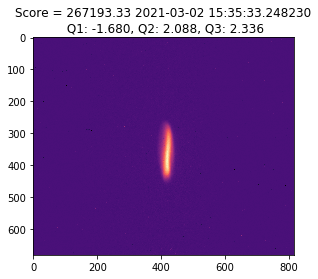

In [57]:

q = randint(100, 999) 
df = pd.DataFrame(columns=['time','Q1','Q2','Q3','score'])
d_df = datetime.now()
m = 50
for i in range(m+1):
    d = datetime.now()
    observation = env.reset()
    obs_mags = env.initial_action() 

    df.loc[i] = [d,obs_mags[0],obs_mags[1],obs_mags[2],env.score]

    plt.imshow(env.observation, cmap="magma", interpolation="None")
    plt.title(f"Score = {env.score:.2f} {d}\n Q1: {obs_mags[0]:.3f}, Q2: {obs_mags[1]:.3f}, Q3: {obs_mags[2]:.3f}")
    # plt.show()
    
    plot_name = d.strftime("%m%d%Y_%H%M%S")+f'_screen_data_acquisition_test_{m}_{i}_{q}'
    plt.savefig(f'./plots/{plot_name}.png',dpi=300,bbox_inches='tight')
    df_name = d_df.strftime("%m%d%Y_%H%M%S")+f'_screen_data_acquisition_test_{m}_{i}_{q}'
    
    
    
    
    df.to_pickle(f"./data/{df_name}.pkl")
    try:
        try:
            os.remove(f"./data/{df_name_old}.pkl")
        except NameError:
            pass
    except OSError:
        pass
    df_name_old = df_name
df_name_old = None

    
    

In [60]:
df_long.to_pickle(f"./data/{'03022021_140717_screen_data_acquisition_test_100_99_213'}.pkl")

In [52]:
df_long = df.copy()

In [58]:
df_long.describe()['score']['std']/df_long.describe()['score']['mean']

0.03343463236120513

In [12]:
observation = env.reset()
# print(f"{env.areamqzm1.k1:.3f}, {env.areamqzm1.k2:.3f}, {env.areamqzm1.k3:.3f}")
obs_mags = env.initial_action() 

i = 0
actions, observations = [], []
for _ in range(2):
    print(f"\rStep {i}", end="")
#     print(f"\rAREAMZQM1: {env.areamqzm1.k1:.3f}, AREAMZQM2: {env.areamqzm2.k1:.3f}, AREAMZQM3: {env.areamqzm3.k1:.3f}, score: {np.sum(env.poisson_weights*np.squeeze(observation)):.2f}")
    observations.append(observation)
    action, _state = saved_policy.predict(observation, deterministic=True)
    print(action)
    action[3] = obs_mags[3]
    action[4] = obs_mags[4]
    
    actions.append(action)
    observation, reward, done, info = env.step(action)
    i += 1
observations = np.array(observations)
actions = np.array(actions)

SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/
SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/
Step 0[-0.29282475  0.66775227 -0.16461754 -0.05648327  0.1887083 ]
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/
SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/
Step 1[-0.2886486   0.6877022  -0.16085243 -0.05519485  0.1894846 ]
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/
SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/


In [5]:
from scipy import optimize

env.reset()
bounds = optimize.Bounds(env.action_space.low, env.action_space.high)
x = optimize.minimize(fun=env.objective_function,
                      x0=env.initial_action(),
                      bounds=bounds)

print(x)

SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/
SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/
SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/
SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/
SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/
SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/
SINBAD.MAGNETS/MAGNET.ML/ARE

In [9]:
x = pydoocs.write("SINBAD.DIAG/CAMERA/AR.MR.BSC.R.1/HBIN", 3)
pydoocs.read("SINBAD.DIAG/CAMERA/AR.MR.BSC.R.1/HBIN")

{'data': 3,
 'type': 'INT',
 'timestamp': 1614680292.351947,
 'macropulse': 0,
 'miscellaneous': {}}

In [8]:
x

SINBAD.MAGNETS/MAGNET.ML/AREAMQZM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM2/
SINBAD.MAGNETS/MAGNET.ML/AREAMQZM3/
SINBAD.MAGNETS/MAGNET.ML/AREAMCVM1/
SINBAD.MAGNETS/MAGNET.ML/AREAMCHM1/


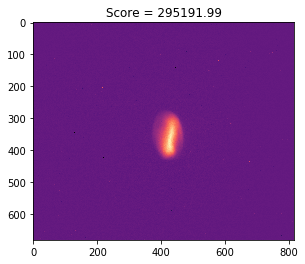

In [6]:
observation = env.reset()
plt.imshow(env.observation, cmap="magma", interpolation="None")
plt.title(f"Score = {np.sum(env.observation):.2f}")
plt.show()

In [5]:
observation = env.reset()
# print(f"{env.areamqzm1.k1:.3f}, {env.areamqzm1.k2:.3f}, {env.areamqzm1.k3:.3f}")

i = 0
actions, observations = [], []
for _ in range(10):
    print(f"\rStep {i}", end="")
    print(f"\rAREAMZQM1: {env.areamqzm1.k1:.3f}, AREAMZQM2: {env.areamqzm2.k1:.3f}, AREAMZQM3: {env.areamqzm3.k1:.3f}, score: {np.sum(env.poisson_weights*np.squeeze(observation)):.2f}")
    observations.append(observation)
    action, _state = model.predict(observation, deterministic=True)
    actions.append(action)
    observation, reward, done, info = env.step(action)
    i += 1
observations = np.array(observations)
actions = np.array(actions)

AREAMZQM1: 6.125, AREAMZQM2: -10.566, AREAMZQM3: 9.150, score: 5283.60
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.86
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90
AREAMZQM1: -0.523, AREAMZQM2: 0.516, AREAMZQM3: 0.679, score: 5589.90


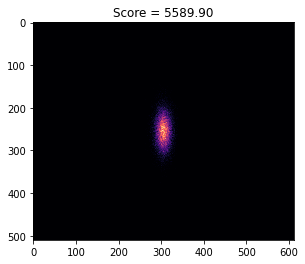

In [6]:
obs = observations[-1]
plt.imshow(obs, cmap="magma", interpolation="None")
plt.title(f"Score = {np.sum(env.poisson_weights*np.squeeze(obs)):.2f}")
plt.show()

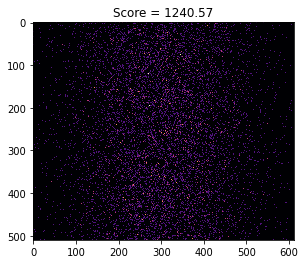

In [42]:
obs = observations[0]
plt.imshow(obs, cmap="magma", interpolation="None")
plt.title(f"Score = {np.sum(env.poisson_weights*np.squeeze(obs)):.2f}")
plt.show()

In [ ]:

plt.imshow(env., cmap="magma", interpolation="None")
plt.title(f"Score = {np.sum(env.poisson_weights*np.squeeze(obs)):.2f}")
plt.show()

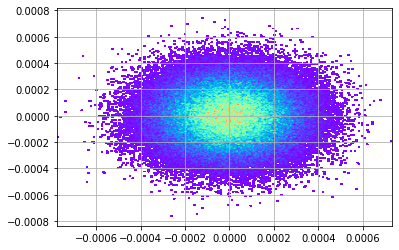

In [65]:
import ocelot.gui.accelerator as ocg
p = env.env.initial_particles
ocg.show_density(p.x(),p.y())